In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\dhima\OneDrive\Documents\e-commerce\data.csv" , encoding="latin1")

In [8]:
print(df.head())
print(df.info())
print(df.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [10]:
# Check for missing values
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [12]:
# Drop duplicates
df = df.drop_duplicates()

# Handle missing values (example: fill numeric with median, categorical with mode)
for col in df.select_dtypes(include="number").columns:
    df[col] = df[col].fillna(df[col].median())
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Ensure date format
if "order_date" in df.columns:
    df["order_date"] = pd.to_datetime(df["order_date"])

In [20]:
# Create revenue column
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

# 1. Total Revenue
total_revenue = df["Revenue"].sum()

# 2. Top 5 Customers by Revenue
top_customers = df.groupby("CustomerID")["Revenue"].sum().nlargest(5)

# 3. Top 5 Products by Revenue
top_products = df.groupby("StockCode")["Revenue"].sum().nlargest(5)

# 4. Monthly Sales Trend
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
monthly_sales = df.groupby(df["InvoiceDate"].dt.to_period("M"))["Revenue"].sum()

print("Total Revenue:", total_revenue)
print("Top Customers:\n", top_customers)
print("Top Products:\n", top_products)
print("Monthly Sales:\n", monthly_sales)

Total Revenue: 9726006.953999998
Top Customers:
 CustomerID
15145.0    1448682.26
14646.0     279489.02
18102.0     256438.49
17450.0     187322.17
14911.0     132458.73
Name: Revenue, dtype: float64
Top Products:
 StockCode
DOT       206245.48
22423     164459.49
47566      98243.88
85123A     97838.45
85099B     92175.79
Name: Revenue, dtype: float64
Monthly Sales:
 InvoiceDate
2010-12     746723.610
2011-01     558448.560
2011-02     497026.410
2011-03     682013.980
2011-04     492367.841
2011-05     722094.100
2011-06     689977.230
2011-07     680156.991
2011-08     681386.460
2011-09    1017596.682
2011-10    1069368.230
2011-11    1456145.800
2011-12     432701.060
Freq: M, Name: Revenue, dtype: float64


In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your cleaned DataFrame
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

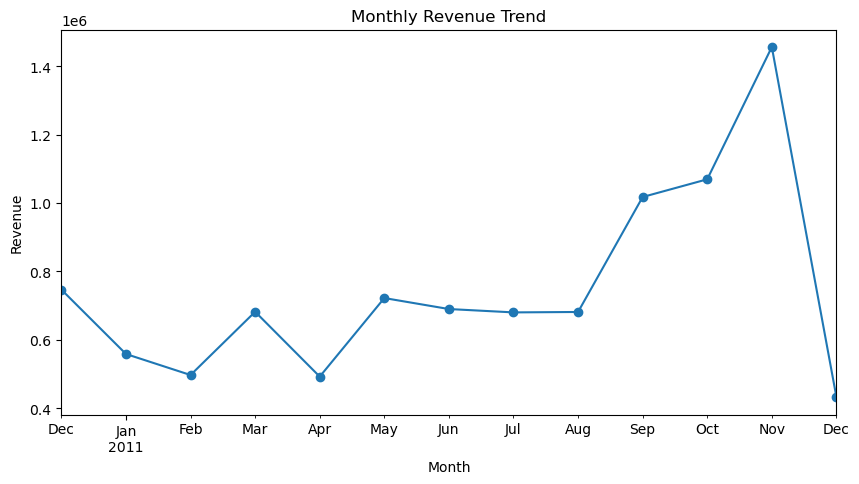

In [26]:
#Monthly Revenue Trend 
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
monthly_sales = df.groupby(df["InvoiceDate"].dt.to_period("M"))["Revenue"].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

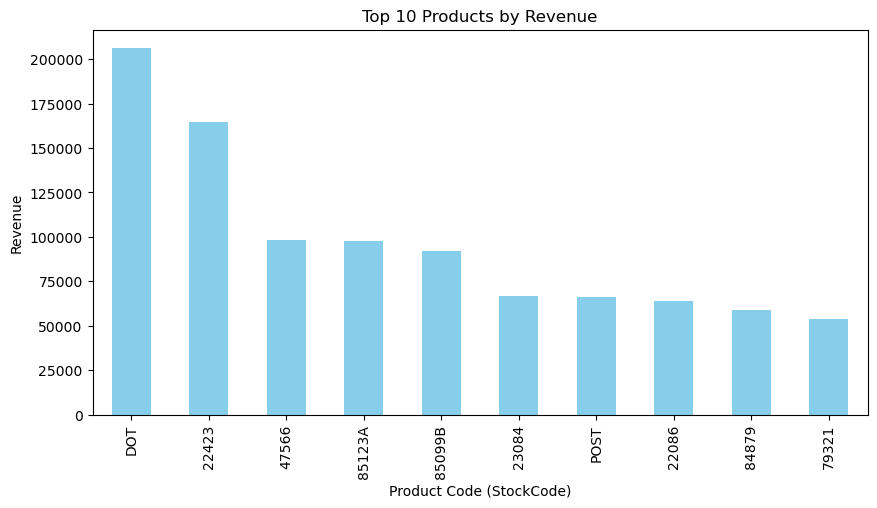

In [28]:
#Top 10 Products by Revenue
top_products = df.groupby("StockCode")["Revenue"].sum().nlargest(10)

plt.figure(figsize=(10,5))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Code (StockCode)")
plt.ylabel("Revenue")
plt.show()

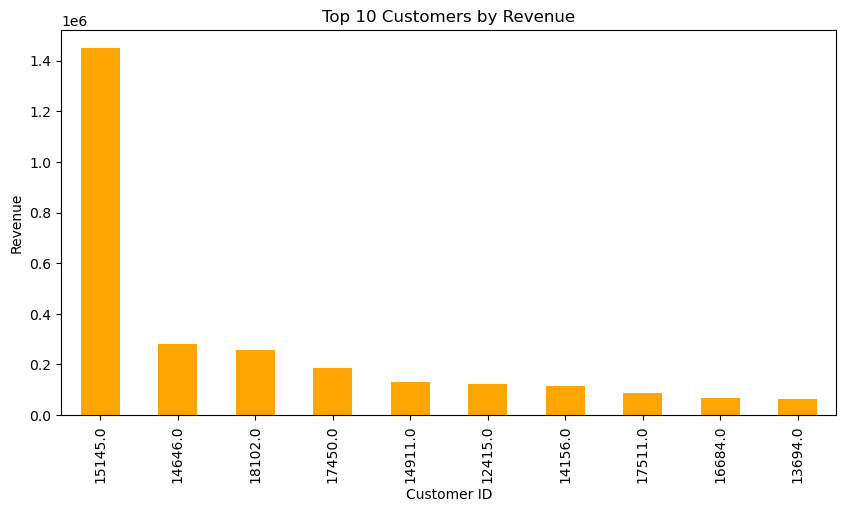

In [30]:
#Top 10 Customers by Revenue
top_customers = df.groupby("CustomerID")["Revenue"].sum().nlargest(10)

plt.figure(figsize=(10,5))
top_customers.plot(kind="bar", color="orange")
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.show()